In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/DELL/Downloads/Online_retail.csv")

In [5]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom  


In [7]:
# Drop unnecessary columns
if 'Description' in df.columns:
    df.drop('Description', axis=1, inplace=True)

In [9]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

In [11]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [13]:
X = df.drop('Country', axis=1)
y = df['Country']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


In [35]:
y_pred = knn.predict(X_test_scaled)
print(" Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


 Accuracy: 94.0 %


In [43]:
#scikit-learn sets precision to 0.0 for those labels.
#We can suppress or control this behavior using the zero_division parameter

print("\n Classification Report:\n", classification_report(y_test, y_pred,zero_division=0))


 Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.65       229
           1       0.45      0.40      0.42        78
           2       1.00      0.20      0.33         5
           3       0.48      0.51      0.49       413
           4       0.67      0.57      0.62         7
           5       0.55      0.41      0.47        29
           6       0.51      0.53      0.52       151
           7       0.70      0.61      0.66       122
           8       0.00      0.00      0.00         2
           9       0.47      0.36      0.41        91
          10       0.71      0.60      0.65      1554
          11       0.60      0.46      0.52        13
          12       0.53      0.51      0.52       156
          13       0.57      0.65      0.61      1672
          14       0.55      0.61      0.58      1836
          15       0.43      0.29      0.34        35
          16       0.74      0.50      0.60        34
 

In [39]:
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Confusion Matrix:
 [[  160     1     0 ...     0     7     1]
 [    2    31     0 ...     0    17     0]
 [    1     0     1 ...     0     0     0]
 ...
 [    0     0     0 ...     4     6     0]
 [    4     9     0 ...     0 71531     8]
 [    0     0     0 ...     0    17    18]]


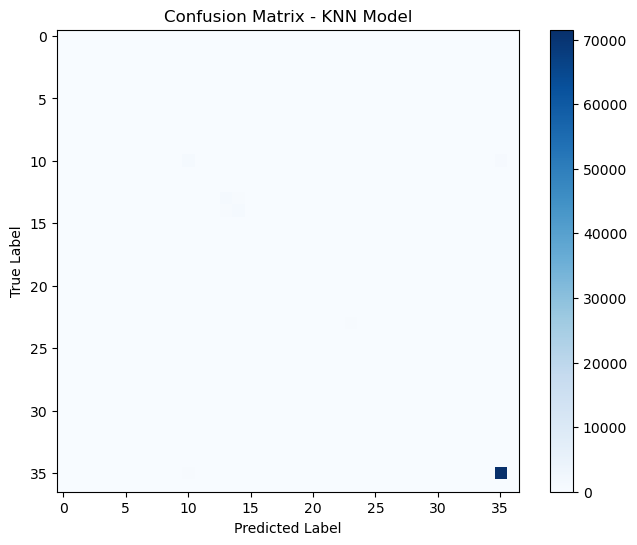

In [41]:
plt.figure(figsize=(8,6))
plt.imshow(confusion_matrix(y_test, y_pred), cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix - KNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()